<a href="https://colab.research.google.com/github/sagar9926/Pytorch/blob/master/Pytorch_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Outline

* Downloading dataset (CIFAR10)
* `Dataloader` in `torch.utils`
* Visualising images
* Single and multiple convolutional layers
* LeNet
* Training LeNet
* Training on GPU
* Simple visualisation
* Exercises

In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np

## Data loading

In [8]:
import torchvision
import torchvision.transforms as transforms

# Cifar is divided into 5 training batches and one test batches
trainset = torchvision.datasets.CIFAR10(root = './data',train = True  # yes i want to train this data
                                        ,download = True # yes i want to download it locally
                                        , transform=transforms.ToTensor())# apllying certain functions to the data at downlading step itself... Transform to tensor

                    

# .datasets hesl us to work with the images in aggregated format instead in form pof different bactes of 10k images each

Extracting ./data/cifar-10-python.tar.gz to ./data


In [0]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [0]:
#Once we have dataset created locally we can load data from it in certain batchsizes e.g in our case batchsize is 4 
# which means every time i load i will get a batch of 4 images randomlly or sequentially based on shuffle

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

In [11]:
# To access the train loader we have to c reate a iterator for that

dataiter = iter(trainloader)
images, labels = dataiter.next() # this gives us one instance of four images and their corresponding labels

print(images.shape) #[(Batch size, channels, size of image)]

print(images[1].shape)
print(labels[1].item())


torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
5


## Visualise data

In [12]:
img = images[1]
print(type(img),img.shape)

<class 'torch.Tensor'> torch.Size([3, 32, 32])


In [13]:
# To plot the image first convert the image tensor to numpy

np_img = img.numpy()
print(np_img.shape)

(3, 32, 32)


In [14]:
# To plot the image we need to transpose the image , permute the dimension
# To be able to plot it we need it to be in the form of x,y,z where x and y correspond to the size of the image and z denotes the number of channels

np_img = np.transpose(np_img,(1,2,0))
print(np_img.shape)

(32, 32, 3)


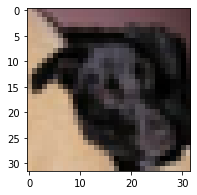

In [15]:
plt.figure(figsize = (3,3))
plt.imshow(np_img) # to plot image using matplotlib
plt.show() #32 x 32 image

In [0]:
def imshow(img):
    npimg = img.numpy()
    plt.figure(figsize = (10,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [17]:
torchvision.utils.make_grid(images).shape # This represents the stacked images of the batch with 2 pixel padding (32* 4 + 2*5(black borders) = 138)


torch.Size([3, 36, 138])

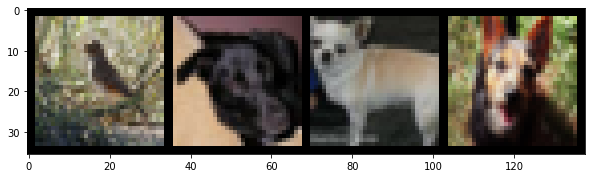

bird dog dog dog


In [18]:
imshow(torchvision.utils.make_grid(images)) #To plot the entire batch, stacks up the images in form of long image in which individual image will apper in cells
print(' '.join(classes[labels[j]] for j in range(4)))

## Single Convolutional Layer

In [0]:
import torch.nn as nn

class FirstCNN(nn.Module):

  def __init__(self):
    super(FirstCNN,self).__init__() # initialising the super class
    self.conv1 = nn.Conv2d(3, 16, 3)#, padding=(1,1), stride=(2,2)) # padding=(1,1), stride=(2,2)) # performing single convolution operation

        
  def forward(self, x):
    x = self.conv1(x)
    return x

In [0]:
net = FirstCNN()

In [21]:
out = net(images)
out.shape #output of first convolution(batchsize,channels,size of output)

torch.Size([4, 16, 30, 30])

In [22]:
# In nn module we can explicitly print parameters as follows

for param in net.parameters():
    print(param.shape) #(16 KERNELS,INPUT 3 CHANNELS, KERNEL SIZE 3x3) # denote weights

    #second output denotes bias , each kernel has one bias this 16 biases

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [23]:
print(out[0, 0, :, :])

tensor([[-2.5496e-01, -1.6950e-01, -9.2860e-02, -1.1992e-01, -8.3360e-02,
         -2.6062e-01, -2.3516e-01, -2.4524e-01, -2.1759e-01, -1.5514e-01,
         -2.8908e-01, -3.0425e-01, -1.8199e-01, -1.4724e-01, -7.8352e-02,
         -1.4662e-01, -1.8240e-01, -1.9482e-01, -2.4186e-01, -2.0396e-01,
         -1.9972e-01, -2.3711e-01, -1.1268e-01, -1.3078e-01, -2.2931e-01,
         -1.8023e-01, -3.1173e-01, -2.2405e-01, -2.0384e-01, -1.4991e-01],
        [-2.3517e-01, -1.8037e-01, -1.3231e-01, -2.4087e-01, -6.9892e-02,
         -1.6207e-01, -1.5912e-01, -3.1824e-01, -2.3610e-01, -2.2229e-01,
         -2.8376e-01, -2.5200e-01, -1.9065e-01, -1.8787e-01, -2.3225e-01,
         -3.2886e-01, -2.7302e-01, -2.4783e-01, -2.2489e-01, -1.5829e-01,
         -1.9449e-01, -2.2676e-01, -1.5869e-01, -1.7668e-01, -2.4966e-01,
         -1.5469e-01, -1.9415e-01, -1.7148e-01, -2.1413e-01, -1.6699e-01],
        [-2.1945e-01, -1.3404e-01, -1.3966e-01, -2.5850e-01, -1.3983e-01,
         -2.0037e-01, -9.2017e-02, -

In [24]:
print(out[0, 0, :, :].detach())

tensor([[-2.5496e-01, -1.6950e-01, -9.2860e-02, -1.1992e-01, -8.3360e-02,
         -2.6062e-01, -2.3516e-01, -2.4524e-01, -2.1759e-01, -1.5514e-01,
         -2.8908e-01, -3.0425e-01, -1.8199e-01, -1.4724e-01, -7.8352e-02,
         -1.4662e-01, -1.8240e-01, -1.9482e-01, -2.4186e-01, -2.0396e-01,
         -1.9972e-01, -2.3711e-01, -1.1268e-01, -1.3078e-01, -2.2931e-01,
         -1.8023e-01, -3.1173e-01, -2.2405e-01, -2.0384e-01, -1.4991e-01],
        [-2.3517e-01, -1.8037e-01, -1.3231e-01, -2.4087e-01, -6.9892e-02,
         -1.6207e-01, -1.5912e-01, -3.1824e-01, -2.3610e-01, -2.2229e-01,
         -2.8376e-01, -2.5200e-01, -1.9065e-01, -1.8787e-01, -2.3225e-01,
         -3.2886e-01, -2.7302e-01, -2.4783e-01, -2.2489e-01, -1.5829e-01,
         -1.9449e-01, -2.2676e-01, -1.5869e-01, -1.7668e-01, -2.4966e-01,
         -1.5469e-01, -1.9415e-01, -1.7148e-01, -2.1413e-01, -1.6699e-01],
        [-2.1945e-01, -1.3404e-01, -1.3966e-01, -2.5850e-01, -1.3983e-01,
         -2.0037e-01, -9.2017e-02, -

In [27]:
!pip install torchviz 

     |████████████████████████████████| 51kB 2.7MB/s 
  Created wheel for torchviz: filename=torchviz-0.0.1-cp36-none-any.whl size=3523 sha256=2fd574ef6f6923ac13dd1142ecd2c2c36a547300dde7bb6798ecd41fd85ee168
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
Successfully built torchviz


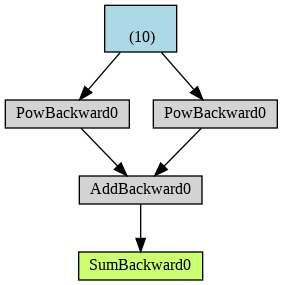

In [28]:
# Explaining the usage of detach
from torchviz import make_dot
x=torch.ones(10, requires_grad=True)

y=x**2
z=x**3
r=(y+z).sum()
make_dot(r).render("attached", format="png")

from IPython.display import Image
Image('attached.png')



In [29]:
r.backward()
x.grad

tensor([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.])

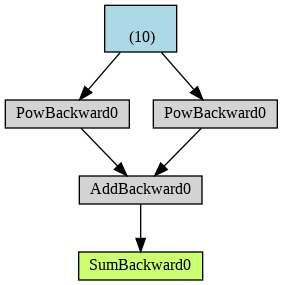

In [30]:
y=x**2
z=x.detach()**3
r1=(y+z).sum()    
make_dot(r).render("detached", format="png")

from IPython.display import Image
Image('detached.png')



In [31]:
x.grad.zero_()
r1.backward()
x.grad

tensor([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

### Note that x is detached before being used in computation of z. And this is the graph of this modified fragment:

### detached graph

### As can be seen the branch of computation with x**3 is no longer tracked. This is reflected in the gradient of the result which no longer records the contribution of this branch:


In [32]:
# After applying convolution we got 16 channels of 30x30 lets plot one channel
out1 = out[0, 0, :, :].detach().numpy() # for zeroth batch , take zeroth channel's all 30x30 values 
# To my understanding, detach disables automatic differentiation, i.e stops keeping track of gradients. thus giving just a te nsor which is later converted to numpy

print(out1.shape)

(30, 30)


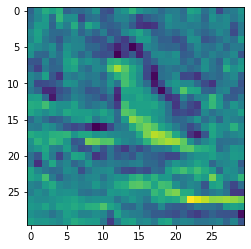

In [33]:
plt.imshow(out[0, 0, :, :].detach().numpy())
plt.show()
# Some deer features can be seen

## Deep Convolutional Network

In [0]:
class FirstCNN_v2(nn.Module) :

  def __init__(self):
    super(FirstCNN_v2,self).__init__()

    self.model = nn.Sequential( # N denotes Batch size
        nn.Conv2d(3, 8, 3),   # (N, 3, 32, 32) -> (N, 8, 30, 30)
            nn.Conv2d(8, 16, 3)   # (N, 8, 30, 30) -> (N, 16, 28, 28)
        )
    
  def forward(self, x):
        x = self.model(x)
        return x

In [35]:
net = FirstCNN_v2()
out = net(images)
out.shape

torch.Size([4, 16, 28, 28])

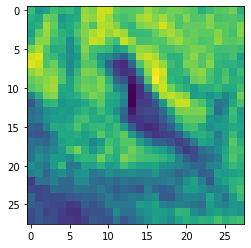

In [36]:
plt.imshow(out[0, 0, :, :].detach().numpy())

In [0]:
class FirstCNN_v3(nn.Module):
    def __init__(self): 
        super(FirstCNN_v3, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 6, 5),          # (N, 3, 32, 32) -> (N, 6, 28, 28)
            nn.AvgPool2d(2, stride=2),   # (N, 6, 28, 28) -> (N, 6, 14, 14)
            nn.Conv2d(6, 16, 5),         # (N, 6, 14, 14) -> (N, 16, 10, 10)
            nn.AvgPool2d(2, stride=2)    # (N, 16, 10, 10) -> (N, 16, 5, 5)
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

In [38]:
net = FirstCNN_v3()
out = net(images)
out.shape

torch.Size([4, 16, 5, 5])

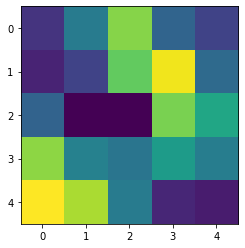

In [39]:
plt.imshow(out[0, 0, :, :].detach().numpy())

In [40]:
!wget https://miro.medium.com/max/1400/1*AwJZkWLKabIicUPzSN6KCg.png

--2020-05-02 12:14:40--  https://miro.medium.com/max/1400/1*AwJZkWLKabIicUPzSN6KCg.png
Resolving miro.medium.com (miro.medium.com)... 104.16.120.145, 104.16.117.145, 104.16.118.145, ...
Connecting to miro.medium.com (miro.medium.com)|104.16.120.145|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72101 (70K) [image/png]
Saving to: ‘1*AwJZkWLKabIicUPzSN6KCg.png’

1*AwJZkWLKabIicUPzS 100%[===================>]  70.41K  --.-KB/s    in 0.003s  

2020-05-02 12:14:40 (23.5 MB/s) - ‘1*AwJZkWLKabIicUPzSN6KCg.png’ saved [72101/72101]



##  LeNet



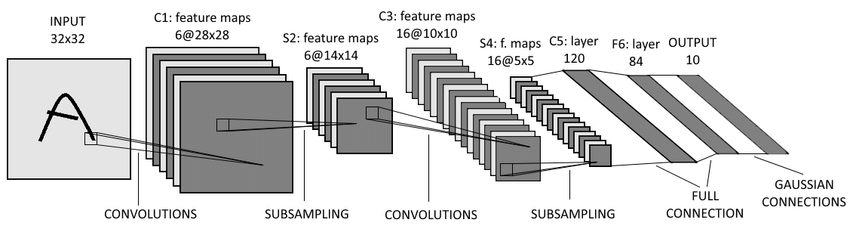

In [41]:
Image("1*AwJZkWLKabIicUPzSN6KCg.png")

In [0]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        print(x.shape)
        x = self.cnn_model(x)
        print(x.shape)
        x = x.view(x.size(0), -1) # (N, 16, 5, 5) -> (N, 400)
        print(x.shape)
        x = self.fc_model(x)
        print(x.shape)
        return x

In [43]:
net = LeNet()
out = net(images)

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [44]:
print(out)

tensor([[ 0.0201,  0.0325,  0.1333,  0.0647, -0.0648, -0.0663, -0.0527, -0.0267,
         -0.1041, -0.0943],
        [ 0.0122,  0.0318,  0.1160,  0.0561, -0.0624, -0.0708, -0.0431, -0.0152,
         -0.0962, -0.0780],
        [ 0.0205,  0.0148,  0.1239,  0.0510, -0.0542, -0.0731, -0.0490, -0.0320,
         -0.1063, -0.0848],
        [ 0.0272,  0.0223,  0.1357,  0.0502, -0.0599, -0.0631, -0.0488, -0.0227,
         -0.1013, -0.0877]], grad_fn=<AddmmBackward>)


In [45]:
max_values, pred_class = torch.max(out.data, 1) #return maximum value along with the index at which it is present
print(pred_class)

tensor([2, 2, 2, 2])


## Training LeNet

In [0]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1) # (N, 16, 5, 5) -> (N, 400)
        x = self.fc_model(x)
        return x

In [47]:
batch_size = 128 # process 128 images in one go
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor()) # Train karna hai, Local me download karke after converting to tensor
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True) # ek baar me random 128 images dena
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor()) # Train nahi karna hai, Local me download kar after converting to tensor
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False) # non random 128 images

Files already downloaded and verified
Files already downloaded and verified


In [0]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader: # iterate over dataloader jo ki ek baar me 128 images dega
        inputs, labels = data 
        outputs = net(inputs) # model se prediction lo jo ki har image k liye ek 10 values ka array ouput dega
        _, pred = torch.max(outputs.data, 1) # ye function maximum value aur uska index return karta hai
        total += labels.size(0)  # Total kitni images hain
        correct += (pred == labels).sum().item() # kitni images correct predict kiya hain
    return 100 * correct / total

In [0]:
net = LeNet()

In [0]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss() # Initialise loss function
opt = optim.Adam(net.parameters()) # initialise optimizer jo ki weight update me kaam aaega

Epoch: 0/16, Test acc: 38.70, Train acc: 38.40
Epoch: 1/16, Test acc: 43.80, Train acc: 44.14
Epoch: 2/16, Test acc: 47.85, Train acc: 48.13
Epoch: 3/16, Test acc: 49.15, Train acc: 50.18
Epoch: 4/16, Test acc: 51.85, Train acc: 53.54
Epoch: 5/16, Test acc: 52.78, Train acc: 55.36
Epoch: 6/16, Test acc: 53.26, Train acc: 56.49
Epoch: 7/16, Test acc: 53.51, Train acc: 57.97
Epoch: 8/16, Test acc: 54.59, Train acc: 59.27
Epoch: 9/16, Test acc: 54.57, Train acc: 60.35
Epoch: 10/16, Test acc: 54.94, Train acc: 61.29
Epoch: 11/16, Test acc: 55.06, Train acc: 62.42
Epoch: 12/16, Test acc: 56.07, Train acc: 63.77
Epoch: 13/16, Test acc: 55.42, Train acc: 63.31
Epoch: 14/16, Test acc: 56.27, Train acc: 65.33
Epoch: 15/16, Test acc: 56.13, Train acc: 65.78


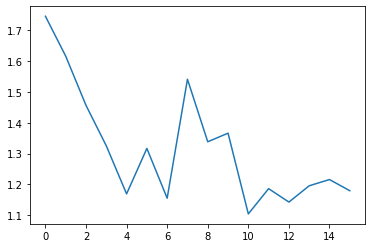

CPU times: user 9min 7s, sys: 7.17 s, total: 9min 15s
Wall time: 9min 16s


In [51]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data

        opt.zero_grad() # clear old gradients , We are resetting any previous gradient values to zero before forward or backward pass

        outputs = net(inputs) # make predictions Forward pass
        loss = loss_fn(outputs, labels) # calculate loss
        loss.backward() # calculate gradients
        opt.step() # update parameters i.e Backward propogation step

        
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.show()

## Move to GPU

In [52]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device) #Moving data to GPU because we will move net() to gpu
        outputs = net(inputs) # thus whenever we call net we should have data in gpu thus all parameters and biases in GPU
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [0]:
net = LeNet().to(device) #moving network itself to GPU
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters()) # since net is already in GPU and optimiser is defined after net thus optimiser is in GPU only

In [55]:
%%time
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        #Moving data to GPU because we moved net() to gpu
        # thus whenever we call net we should have data in gpu

        opt.zero_grad()

        outputs = net(inputs) #In GPU
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
    print('Epoch: %d/%d' % (epoch, max_epochs))

Epoch: 0/16
Epoch: 1/16
Epoch: 2/16
Epoch: 3/16
Epoch: 4/16
Epoch: 5/16
Epoch: 6/16
Epoch: 7/16
Epoch: 8/16
Epoch: 9/16
Epoch: 10/16
Epoch: 11/16
Epoch: 12/16
Epoch: 13/16
Epoch: 14/16
Epoch: 15/16
CPU times: user 2min 14s, sys: 1.07 s, total: 2min 15s
Wall time: 2min 15s


In [56]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))

Test acc: 54.85, Train acc: 64.30


## Basic Visualisation

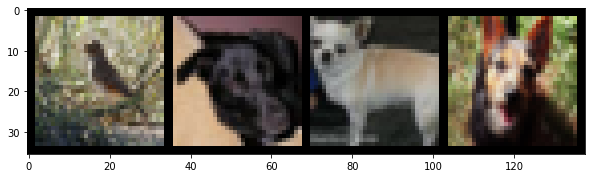

In [57]:
imshow(torchvision.utils.make_grid(images))

In [0]:
# above variable images is in CPU thus moving parameters to CPU
net = net.to('cpu')

In [59]:
out = net(images)
print(out.shape) #this will give me final output but i need to plot the intermediate steps

torch.Size([4, 10])


In [60]:
out = net.cnn_model(images)
out.shape
# without [0] means to access all the layers in the sequential description


torch.Size([4, 16, 5, 5])

In [61]:

# with [0] means to access all the first layer in the sequential description

out = net.cnn_model[0](images)
out.shape

torch.Size([4, 6, 28, 28])

<Figure size 144x144 with 0 Axes>

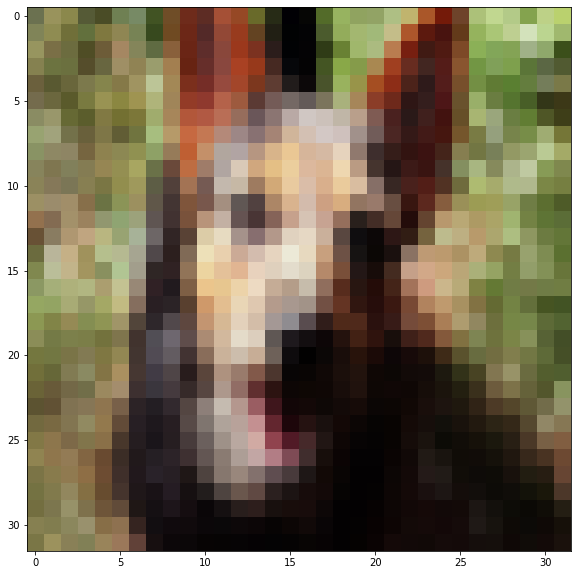

In [62]:
image_id = 3
plt.figure(figsize = (2,2))
imshow(images[image_id,])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


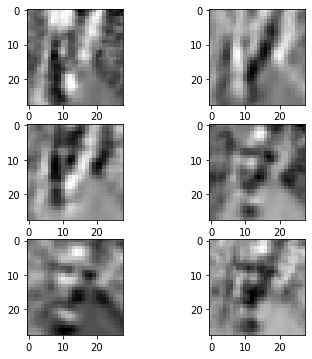

In [63]:
plt.figure(figsize = (6,6))
plt.subplot(321) # 3 rows 2 columns
for i in range(6):
    ax1 = plt.subplot(3, 2, i+1)
    plt.imshow(out[image_id, i, :, :].detach().numpy(), cmap="binary") # plotting all the channels corresponding to above image
plt.show()